# Call Geo Engine via API

In [1]:
import geoengine as ge
from datetime import datetime

## Initialize

In [3]:
ge.initialize("http://localhost:3030")

## Register workflow

In [4]:
workflow = ge.register_workflow({
    "type": "Vector",
    "operator": {
        "type": "RasterVectorJoin",
        "params": {
                "names": ["NDVI"],
                "aggregation": "none"
        },
        "sources": {
            "vector": {
                "type": "OgrSource",
                "params": {
                    "dataset": {
                        "type": "internal",
                        "datasetId": "a9623a5b-b6c5-404b-bc5a-313ff72e4e75"
                    },
                    "attributeProjection": None
                }
            },
            "rasters": [{
                "type": "GdalSource",
                "params": {
                    "dataset": {
                        "type": "internal",
                        "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                    }
                }
            }]
        },
    }
})

workflow

2d91afad-4423-5d42-9a25-8cabaf905199

## Get result metadata of workflow

In [5]:
workflow.get_result_descriptor()

Data type:         MultiPoint
Spatial Reference: EPSG:4326
Columns:           website: text
                   name: text
                   scalerank: int
                   featurecla: text
                   NDVI: int
                   natlscale: float

## Get dataframe via WFS

In [6]:
time = datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_dataframe(
    ge.Bbox(
        [-111.533203125, -4.482421875, 114.345703125, 73.388671875],
        [time, time]
        )
    )

data

,website,scalerank,natlscale,name,NDVI,featurecla,geometry,start,end
0,www.rocargo.com/SanNicolas.html,8,5.0,Sint Nicolaas,77,Port,POINT (-69.92356 12.43750),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
1,www.ab.gov.ag,8,5.0,Saint John's,125,Port,POINT (-61.85230 17.12278),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
2,www.portofoostende.be,8,5.0,Oostende (Ostend),177,Port,POINT (2.93369 51.23000),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
3,www.zeebruggeport.be,8,5.0,Zeebrugge,136,Port,POINT (3.20459 51.33639),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
4,www.port-burgas.com,8,5.0,Burgas,138,Port,POINT (27.45830 42.47000),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...
733,www.panynj.gov,3,75.0,New York,82,Port,POINT (-74.02426 40.68833),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
734,www.portofgalveston.com,3,75.0,Galveston,78,Port,POINT (-94.81790 29.30417),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
735,www.vaports.com,3,75.0,Norfolk,136,Port,POINT (-76.29252 36.90194),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00
736,None,3,75.0,Toronto,73,Port,POINT (-79.38000 43.61000),2014-04-01 00:00:00+00:00,2014-05-01 00:00:00+00:00


## Plot points colored by NDVI value

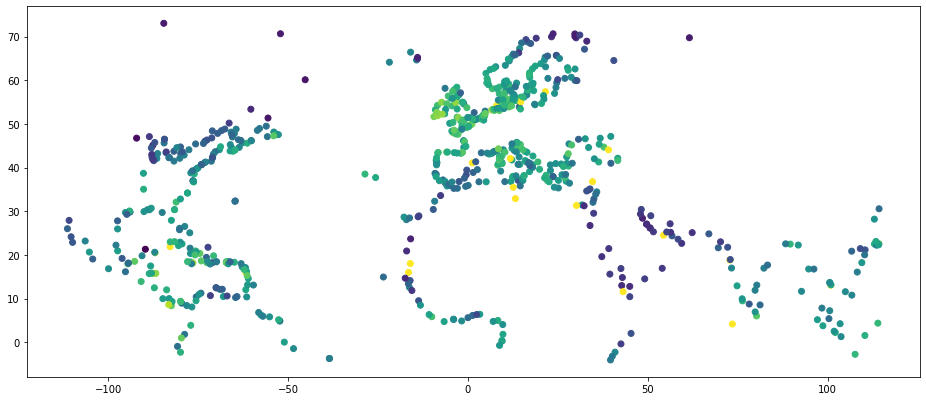

In [7]:
data.plot('NDVI', figsize=(16, 8));